In [1]:
import pandas as pd

In [3]:
# Merging 10 districts
file_name = [
    'Bolton_processed.csv',
    'Bury_processed.csv',
    'Manchester_processed.csv',
    'Oldham_processed.csv',
    'Rochdale_processed.csv',
    'Salford_processed.csv',
    'Stockport_processed.csv',
    'Tameside_processed.csv',
    'Trafford_processed.csv',
    'Wigan_processed.csv'
]
dfs = [pd.read_csv(file) for file in file_name]

# Align All Columns
all_cols = set()
for df in dfs:
    all_cols.update(df.columns)

# Checking all dfs have all cols
aligned_dfs = [df.reindex(columns = all_cols) for df in dfs]

# Merge
epc_dfs = pd.concat(aligned_dfs, ignore_index = True)
epc_dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12698 entries, 0 to 12697
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   LMK_KEY                        12698 non-null  object 
 1   CO2_EMISS_CURR_PER_FLOOR_AREA  12698 non-null  int64  
 2   MAIN_FUEL                      12698 non-null  object 
 3   CURRENT_ENERGY_RATING          12698 non-null  object 
 4   TOTAL_FLOOR_AREA               12698 non-null  float64
 5   BUILT_FORM                     12698 non-null  object 
 6   BUILDING_REFERENCE_NUMBER      12698 non-null  int64  
 7   INSPECTION_DATE                12698 non-null  object 
 8   CONSTRUCTION_AGE_BAND          12698 non-null  object 
 9   POSTCODE                       12698 non-null  object 
 10  District                       12698 non-null  object 
 11  longitude                      12698 non-null  float64
 12  CURRENT_ENERGY_EFFICIENCY      12698 non-null 

In [5]:
epc_dfs.head()

,LMK_KEY,CO2_EMISS_CURR_PER_FLOOR_AREA,MAIN_FUEL,CURRENT_ENERGY_RATING,TOTAL_FLOOR_AREA,BUILT_FORM,BUILDING_REFERENCE_NUMBER,INSPECTION_DATE,CONSTRUCTION_AGE_BAND,POSTCODE,District,longitude,CURRENT_ENERGY_EFFICIENCY,ENERGY_CONSUMPTION_CURRENT,UPRN,latitude,PROPERTY_TYPE,ADDRESS1
0,62d3e2d3c263f106410abe5944b8a7fa51468f920620fa...,111,oil (not community),F,97.0,End-Terrace,176140868,2022-10-07,England and Wales: 1967-1975,BL2 4LS,Bolton,-2.365426,25,424,1.000126e+11,53.606591,House,3 Bowstone Hill Cottages
1,1cf10c540b45af0818a24c05cba4dcff68f38de13445ce...,123,electricity (not community),E,44.0,Mid-Terrace,312060678,2022-02-15,England and Wales: 1900-1929,BL2 3BN,Bolton,-2.410668,52,728,-1.000000e+00,53.598076,Flat,545a Tonge Moor Road
2,56ff0134d2eff1da8ea33b2ffbb584d4ceb743b4bcfd1d...,41,LPG (not community),F,279.0,Detached,406816868,2024-04-24,England and Wales: before 1900,BL2 4JF,Bolton,-2.372088,36,188,1.000124e+11,53.595974,House,Nab Lane Farm
3,17ab658e7704449c5cbed8325b82314f6c0bd6e0636f3b...,58,LPG (not community),F,116.0,Semi-Detached,674138668,2024-03-06,England and Wales: before 1900,BL2 4LL,Bolton,-2.380893,27,268,-1.000000e+00,53.613905,House,1 Top O Th Knotts Cottages
4,71ae5dcbfbb170831c36b0aea87b611ef0ca55cf6cc462...,74,electricity (not community),E,53.0,Mid-Terrace,831567568,2024-06-17,England and Wales: before 1900,BL1 8NL,Bolton,-2.432000,43,441,1.000109e+11,53.598000,Maisonette,456a Blackburn Road


In [7]:
epc_dfs.to_csv('all_low_epc.csv')

In [9]:
# low-EPC buildings characteristics

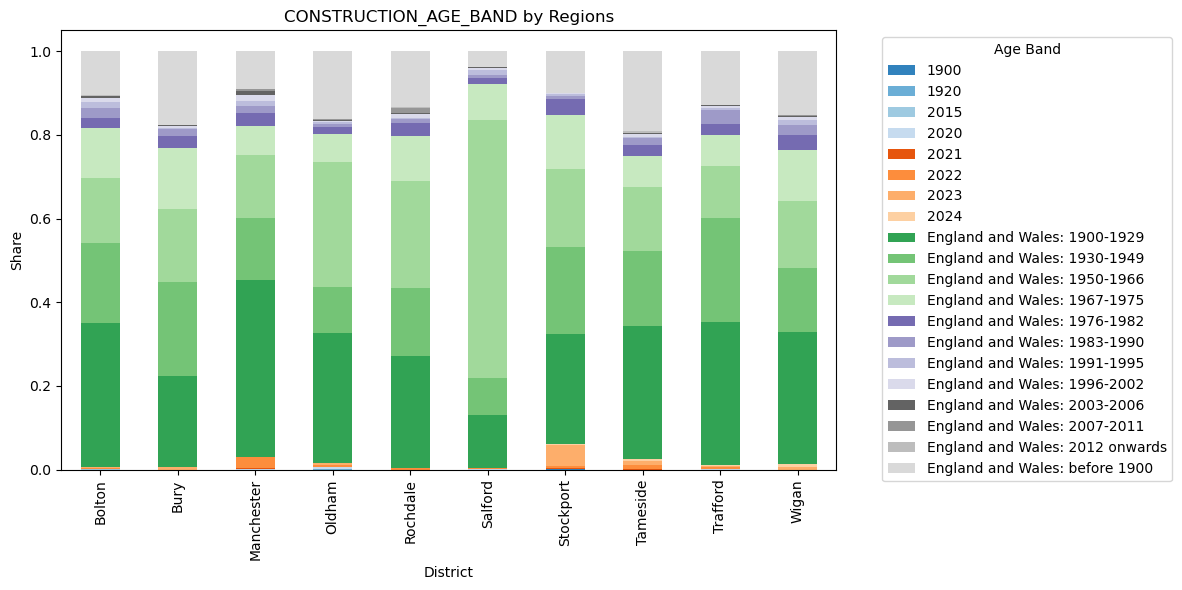

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("all_low_epc.csv")

# construction_age distribution
age_dist = (
    df.groupby(["District","CONSTRUCTION_AGE_BAND"])
      .size()
      .reset_index(name="count")
)
age_dist["ratio"] = age_dist.groupby("District")["count"].transform(lambda x: x/x.sum())

pivot_age = age_dist.pivot(index="District", columns="CONSTRUCTION_AGE_BAND", values="ratio").fillna(0.0)

pivot_age.plot(kind="bar", stacked=True, figsize=(12,6), colormap="tab20c")
plt.title("CONSTRUCTION_AGE_BAND by Regions")
plt.ylabel("Share")
plt.xlabel("District")
plt.legend(title="Age Band", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [13]:
# Filter <=1990
bands_pre1990 = [
    '1900', '1920', 
    "England and Wales: before 1900",
    "England and Wales: 1900-1929",
    "England and Wales: 1930-1949",
    "England and Wales: 1950-1966",
    "England and Wales: 1967-1975",
    "England and Wales: 1976-1982",
    "England and Wales: 1983-1990"
]

df["pre1990"] = df["CONSTRUCTION_AGE_BAND"].isin(bands_pre1990)

# proportions by regions
age_stats = (
    df.groupby("District")["pre1990"]
      .mean()
      .reset_index(name="share_pre1990")
)

age_stats_sorted = age_stats.sort_values("share_pre1990", ascending=False)
print(age_stats_sorted)

     District  share_pre1990
1        Bury       0.982068
5     Salford       0.977179
8    Trafford       0.976864
3      Oldham       0.973003
4    Rochdale       0.966851
0      Bolton       0.963295
9       Wigan       0.960478
7    Tameside       0.958904
6   Stockport       0.934194
2  Manchester       0.929377


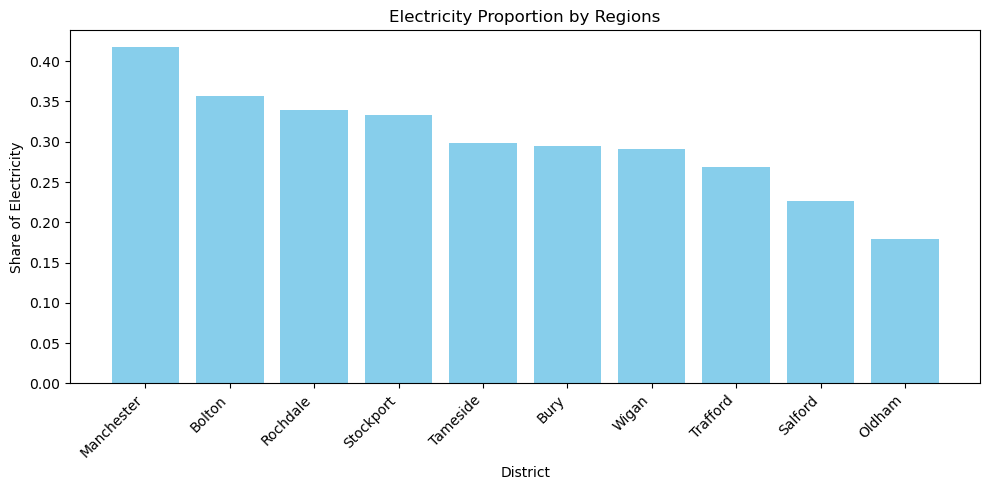

In [15]:
# MAIN_FUEL electricity proportion

def normalize_fuel(x):
    if not isinstance(x, str):
        return "Other"
    s = x.lower()
    if "electric" in s:
        return "Electricity"
    if "gas" in s:
        return "Gas"
    return "Other"

df["MAIN_FUEL_NORM"] = df["MAIN_FUEL"].map(normalize_fuel)

fuel_dist = (
    df.groupby(["District","MAIN_FUEL_NORM"])
      .size()
      .reset_index(name="count")
)

fuel_dist["ratio"] = fuel_dist.groupby("District")["count"].transform(lambda x: x/x.sum())

# electric ratio
electricity_share = fuel_dist[fuel_dist["MAIN_FUEL_NORM"]=="Electricity"]
# descending
electricity_share = electricity_share.sort_values("ratio", ascending=False)

plt.figure(figsize=(10,5))
plt.bar(electricity_share["District"], electricity_share["ratio"], color="skyblue")
plt.title("Electricity Proportion by Regions")
plt.ylabel("Share of Electricity")
plt.xlabel("District")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()